## Initial overview

Loading the CSV file containing the housing data to perform exploratory data analysis (EDA), data preparation, and eventually build the regression models.

In [1]:
import pandas as pd

# Path to the dataset
data_path = 'train.csv'

# Loading the dataset
housing_data = pd.read_csv(data_path)

print(f'The shape of the housing data is: {housing_data.shape}')

# print(housing_data.describe)

# Displaying the first few rows of the dataset for an initial overview
housing_data.head()

The shape of the housing data is: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Understanding, Preparation, and Exploratory Data Analysis (EDA)

In [2]:
# Summary of the dataset
summary = housing_data.describe(include='all')

# Checking for missing values
missing_values = housing_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Checking for duplicate rows
duplicate_rows = housing_data.duplicated().sum()

# Displaying the summary, missing values, and duplicate rows count
summary, missing_values, duplicate_rows


(                 Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
 count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
 unique          NaN          NaN        5          NaN            NaN      2   
 top             NaN          NaN       RL          NaN            NaN   Pave   
 freq            NaN          NaN     1151          NaN            NaN   1454   
 mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
 std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
 min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
 25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
 50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
 75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
 max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   
 
        Alley LotShape Lan

### Data Summary:

The dataset has 1460 entries with 81 features.
Features include a mix of numerical and categorical data.
SalePrice is the target variable.

### Missing Values:

Several features have missing values, with some like PoolQC, MiscFeature, and Alley having over 1000 missing entries.
LotFrontage, Garage related features, and Bsmt related features also have a significant number of missing values.
### Duplicates:

No duplicate rows were found in the dataset.

### Dropping columns with more than 200 null values

In [3]:
# Identifying columns with more than 200 missing values
columns_to_drop = housing_data.columns[housing_data.isnull().sum() > 200]

# Dropping these columns from the dataset
reduced_housing_data = housing_data.drop(columns=columns_to_drop)

# You can check how many columns were dropped
columns_dropped = len(housing_data.columns) - len(reduced_housing_data.columns)

print(f"Columns dropped: {columns_dropped}")
print(f"Dropped columns: {columns_to_drop}")
housing_data = reduced_housing_data
housing_data.shape


Columns dropped: 7
Dropped columns: Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


(1460, 74)

### Check correlation matrix based on on top 10 correlated features

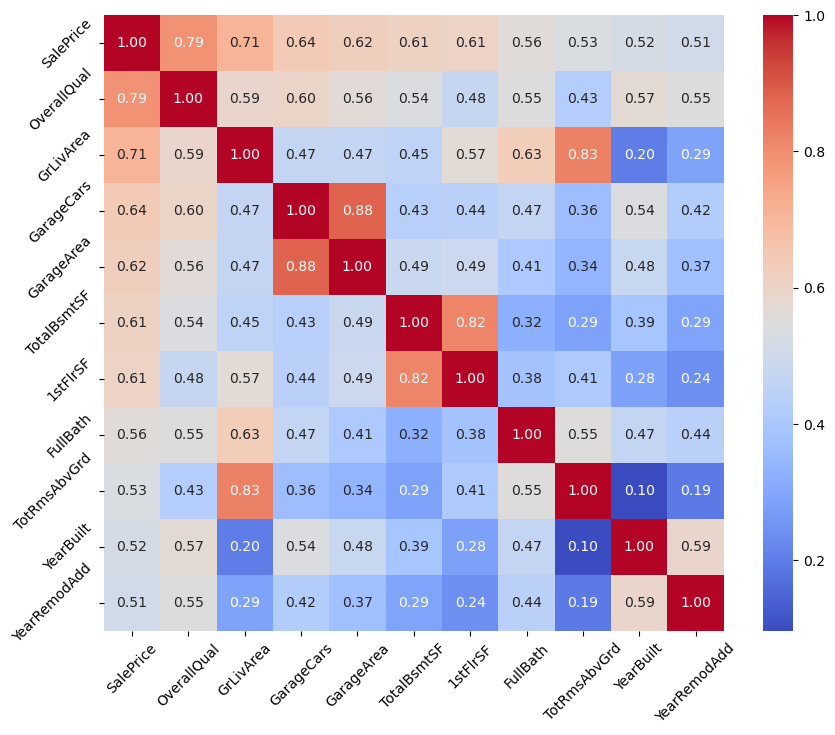

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set target variable
target_variable = 'SalePrice'

# Selecting only numerical columns
numerical_data = housing_data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Identify the top 10 features most correlated with the target variable
top_10_features = corr_matrix[target_variable].abs().sort_values(ascending=False).head(11).index

# Compute the correlation matrix for these top features
top_corr_matrix = numerical_data[top_10_features].corr()

# matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(top_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")

# Adjust layout for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


## Data Preparation:


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np 

# Drop rows with any null values
housing_data_clean = housing_data.dropna()

X = housing_data_clean.drop('SalePrice', axis=1)
y = housing_data_clean['SalePrice']

# Identifying numerical and categorical columns
numerical_cols = housing_data_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = housing_data_clean.select_dtypes(include=['object']).columns.tolist()

# Removing the 'SalePrice' from the list of numerical columns
numerical_cols = [col for col in numerical_cols if col != 'SalePrice']

# Define the scaler for numerical features
scaler = StandardScaler()

# Define the one-hot encoder for categorical features
onehot = OneHotEncoder(handle_unknown='ignore')

# Apply the transformations separately
X_num_transformed = scaler.fit_transform(housing_data_clean[numerical_cols])
X_cat_transformed = onehot.fit_transform(housing_data_clean[categorical_cols])

# Convert the transformed categorical data to a dense format
X_cat_transformed_dense = X_cat_transformed.toarray()

# Combine the numerical and categorical data
X_combined = np.hstack((X_num_transformed, X_cat_transformed_dense))

# Get the transformed feature names for categorical columns
categorical_features_transformed = onehot.get_feature_names_out(input_features=categorical_cols)
all_features = numerical_cols + list(categorical_features_transformed)

# Creating a DataFrame from the combined transformed features
processed_data = pd.DataFrame(X_combined, columns=all_features)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_data, housing_data_clean['SalePrice'], test_size=0.2, random_state=0)

# Displaying the first few rows of the processed data
processed_data.head()


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.731951,0.093701,-0.218363,0.589337,-0.553402,1.014157,0.854216,0.461582,0.527157,-0.296255,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.729579,-0.876298,-0.107067,-0.165963,2.230251,0.100528,-0.476562,-0.594820,1.120240,-0.296255,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.727207,0.093701,0.052620,0.589337,-0.553402,0.946480,0.804928,0.278328,0.047458,-0.296255,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.724836,0.336201,-0.111906,0.589337,-0.553402,-1.963596,-0.772291,-0.594820,-0.541263,-0.296255,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.722464,0.093701,0.343926,1.344638,-0.553402,0.912642,0.706352,1.291612,0.415954,-0.296255,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


The data has been successfully processed and is now in a clean format suitable for analysis. The steps taken were:

### Numerical Features:

Dropped records with Null values.
Data was scaled using standard scaling.
### Categorical Features:

One-hot encoding was applied to convert categorical variables into a format suitable for modeling.
### Merged Data:

The processed numerical and categorical data were combined into a single DataFrame.
The final dataset contains 261 features, including both original and derived from one-hot encoding.
With the data prepared, the next step is to build and evaluate regression models using Ridge and Lasso regularization. We will tune the models to find the optimal lambda (regularization strength) with Cross-validation and assess the significance of different variables in predicting house prices.

## Multicollinearity Removal

Since the feature space is high, manual feature elimination is not practical, so proceeding with RFE method.

## Feature Selection using RFE

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a base model for feature selection
model = LinearRegression()

# Count the total number of features in the dataset
# total_features = X_train.shape[1]

# Initialize RFE with the desired number of features
rfe = RFE(model, n_features_to_select=200)  # Adjusted n_features_to_select as 200 to limit the features and simplify the model

# Fit RFE on the training data
rfe = rfe.fit(X_train, y_train)

# Summarize selected features
selected_features = X_train.columns[rfe.support_]
print(selected_features)

# Create a new DataFrame with only the selected features
selected_data = processed_data[selected_features]

# Splitting the selected data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(selected_data, y, test_size=0.2, random_state=0)

Index(['MSZoning_C (all)', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=200)


## Model Evaluation

In [7]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

# Creating 100 values evenly spaced on a log scale
alphas = np.logspace(-3, 2, 100)  

# Create and fit the RidgeCV model
ridge_cv_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv_model.fit(X_train_selected, y_train_selected)

# Predict on the training data using the model with the best found alpha
y_train_pred_ridge = ridge_cv_model.predict(X_train_selected)

# Calculate R-squared for training data
r2_train_ridge = r2_score(y_train_selected, y_train_pred_ridge)

print(f"Ridge Best alpha: {ridge_cv_model.alpha_}")
print(f"Ridge R-squared (Train): {r2_train_ridge}")


Ridge Best alpha: 3.8535285937105273
Ridge R-squared (Train): 0.8204142635357901


In [8]:
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings('ignore')

# Create and fit the LassoCV model
lasso_cv_model = LassoCV(alphas=alphas, cv=5)
lasso_cv_model.fit(X_train_selected, y_train_selected)

# Predict on the training data using the model with the best found alpha
y_train_pred_lasso = lasso_cv_model.predict(X_train_selected)

# Calculate R-squared for training data
r2_train_lasso = r2_score(y_train_selected, y_train_pred_lasso)

print(f"Lasso Best alpha: {lasso_cv_model.alpha_}")
print(f"Lasso R-squared (Train): {r2_train_lasso}")


Lasso Best alpha: 100.0
Lasso R-squared (Train): 0.818516707319751


### Display more metrics

In [9]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict on the training data using the Ridge model
y_train_pred_ridge = ridge_cv_model.predict(X_train_selected)

# Calculate R-squared for training data
r2_train_ridge = r2_score(y_train_selected, y_train_pred_ridge)

# Calculate MSE and RMSE for training data
mse_train_ridge = mean_squared_error(y_train_selected, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)

# Print the metrics for training data
print(f"Ridge R-squared (Train): {r2_train_ridge}")
print(f"Ridge Mean Squared Error (Train): {mse_train_ridge}")
print(f"Ridge Root Mean Squared Error (Train): {rmse_train_ridge}")


Ridge R-squared (Train): 0.8204142635357901
Ridge Mean Squared Error (Train): 1169110877.1003654
Ridge Root Mean Squared Error (Train): 34192.263410022526


In [10]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# # Predict on the training data using the Lasso model
# y_train_pred_lasso = lasso_cv_model.predict(X_train_selected)

# # Calculate R-squared for training data
# r2_train_lasso = r2_score(y_train_selected, y_train_pred_lasso)

# Calculate MSE and RMSE for training data
mse_train_lasso = mean_squared_error(y_train_selected, y_train_pred_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)

# Print the metrics for training data
print(f"Lasso R-squared (Train): {r2_train_lasso}")
print(f"Lasso Mean Squared Error (Train): {mse_train_lasso}")
print(f"Lasso Root Mean Squared Error (Train): {rmse_train_lasso}")


Lasso R-squared (Train): 0.818516707319751
Lasso Mean Squared Error (Train): 1181464049.772978
Lasso Root Mean Squared Error (Train): 34372.43153710511


### Residual Analysis

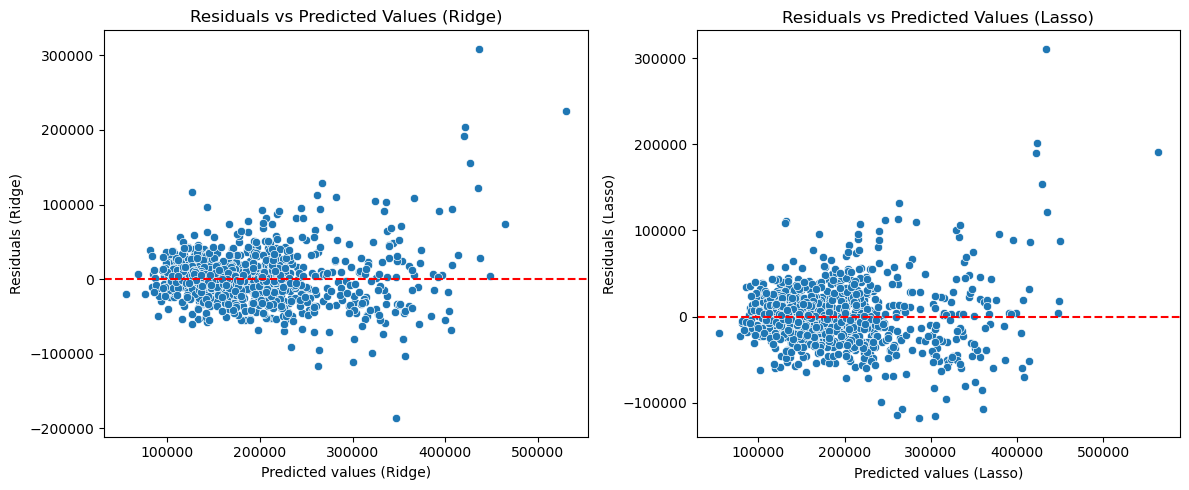

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# # Predict on the training data using RidgeCV and LassoCV models
# y_train_pred_ridge = ridge_cv_model.predict(X_train)
# y_train_pred_lasso = lasso_cv_model.predict(X_train)

# Calculate residuals for Ridge and Lasso
residuals_ridge = y_train_selected - y_train_pred_ridge
residuals_lasso = y_train_selected - y_train_pred_lasso

# Plotting residuals for Ridge
plt.figure(figsize=(12, 5))

# Residuals vs Predicted values for Ridge
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred_ridge, y=residuals_ridge)
plt.xlabel('Predicted values (Ridge)')
plt.ylabel('Residuals (Ridge)')
plt.title('Residuals vs Predicted Values (Ridge)')
plt.axhline(y=0, color='r', linestyle='--')

# Residuals vs Predicted values for Lasso
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_train_pred_lasso, y=residuals_lasso)
plt.xlabel('Predicted values (Lasso)')
plt.ylabel('Residuals (Lasso)')
plt.title('Residuals vs Predicted Values (Lasso)')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()


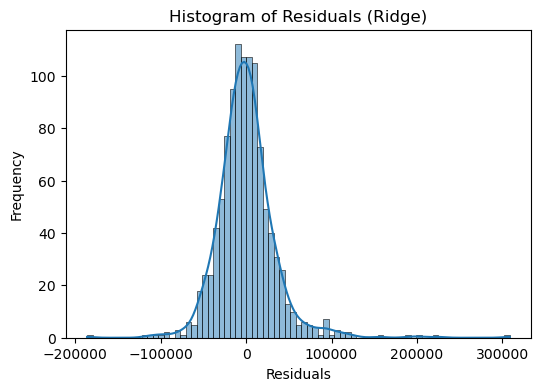

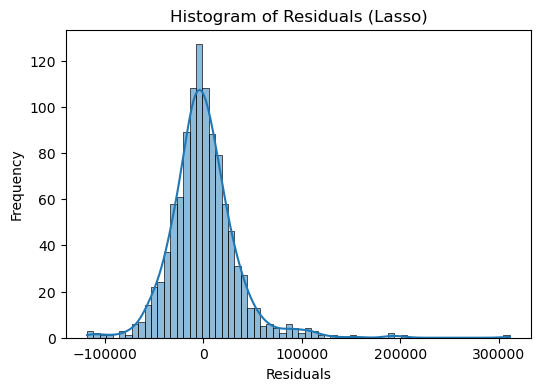

In [12]:
# Histogram for normality of Ridge residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals_ridge, kde=True)
plt.title('Histogram of Residuals (Ridge)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Histogram for normality of Lasso residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals_lasso, kde=True)
plt.title('Histogram of Residuals (Lasso)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


#### In both Ridge and Lasso, the residuals look normaly distributed with minor differences.

## Test Predictions with Ridge and Lasso based models

### Ridge Prediction

Ridge R-squared (Train): 0.8204142635357901
Ridge Mean Squared Error (Train): 1169110877.1003654
Ridge Root Mean Squared Error (Train): 34192.263410022526
Ridge R-squared (Test): 0.7661618987504312
Ridge Mean Squared Error (Test): 1185046663.7764618
Ridge Root Mean Squared Error (Test): 34424.50673250761


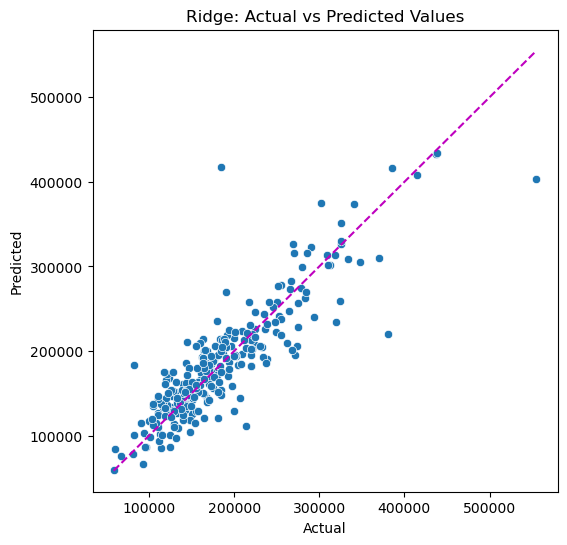

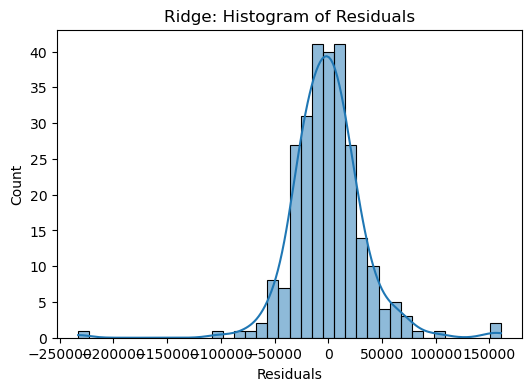

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test data using the Ridge model
y_test_pred_ridge = ridge_cv_model.predict(X_test_selected)

# Calculate R-squared for test data
r2_test_ridge = r2_score(y_test_selected, y_test_pred_ridge)

# Calculate MSE and RMSE for test data
mse_test_ridge = mean_squared_error(y_test_selected, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

# Print the metrics for training data 
print(f"Ridge R-squared (Train): {r2_train_ridge}")
print(f"Ridge Mean Squared Error (Train): {mse_train_ridge}")
print(f"Ridge Root Mean Squared Error (Train): {rmse_train_ridge}")

# Print the metrics for test data
print(f"Ridge R-squared (Test): {r2_test_ridge}")
print(f"Ridge Mean Squared Error (Test): {mse_test_ridge}")
print(f"Ridge Root Mean Squared Error (Test): {rmse_test_ridge}")

# Plot actual vs predicted values for Ridge
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_selected, y=y_test_pred_ridge)
plt.plot([y_test_selected.min(), y_test_selected.max()], [y_test_selected.min(), y_test_selected.max()], 'm--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge: Actual vs Predicted Values')
plt.show()

# Calculate residuals for Ridge
residuals_test_ridge = y_test_selected - y_test_pred_ridge

# Histogram of residuals for Ridge
plt.figure(figsize=(6, 4))
sns.histplot(residuals_test_ridge, kde=True)
plt.xlabel('Residuals')
plt.title('Ridge: Histogram of Residuals')
plt.show()


### Check for non-linearity for top impacting features (ridge)

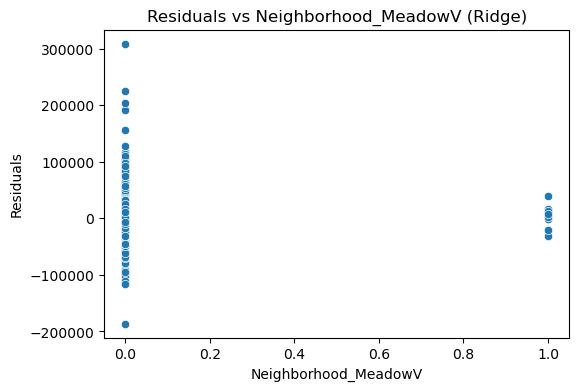

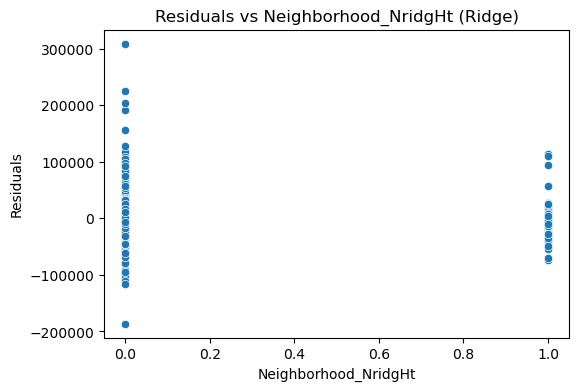

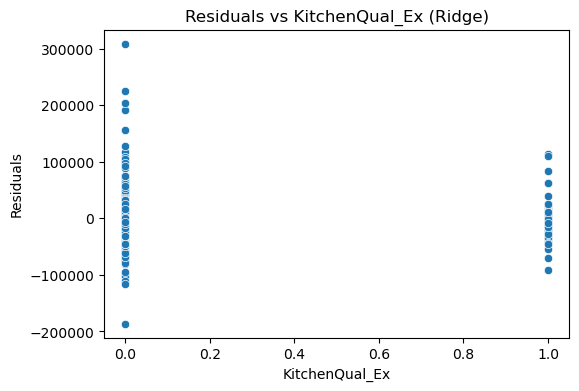

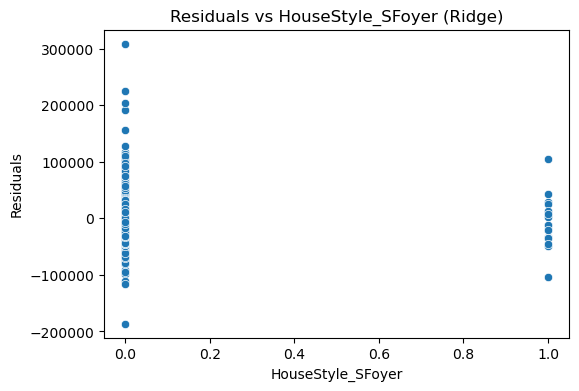

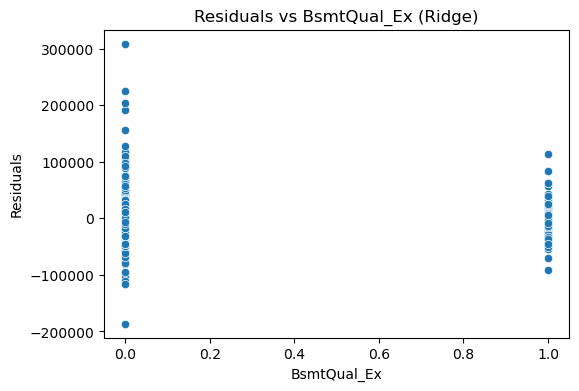

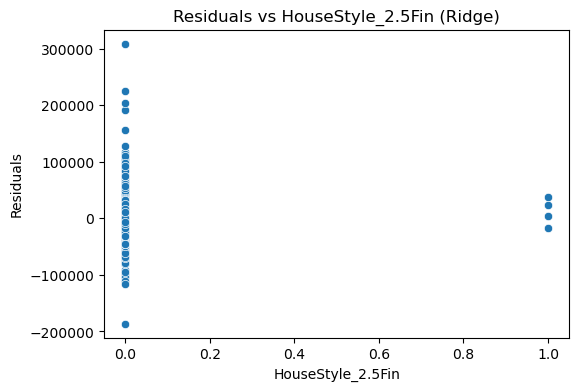

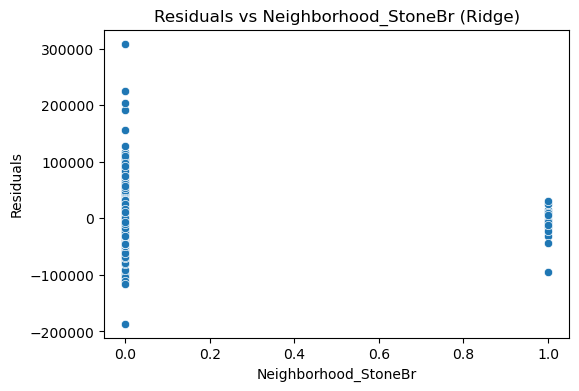

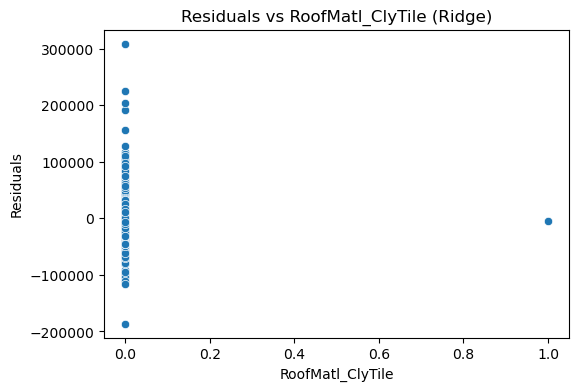

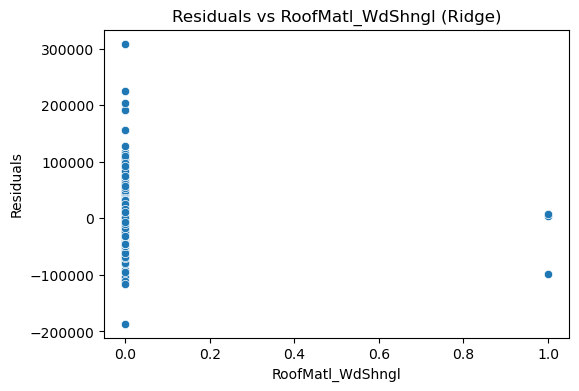

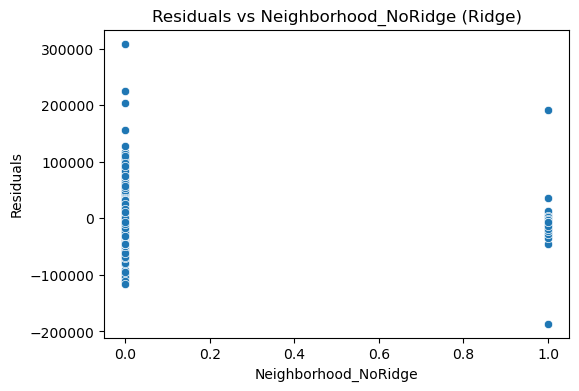

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

coefficients_ridge = np.abs(ridge_cv_model.coef_)

# Get the top 10 features' indices sorted by coefficient magnitude
top_10_indices_ridge = np.argsort(coefficients_ridge)[-10:]

# Get the feature names for the top 10 features
top_10_features_ridge = X_train_selected.columns[top_10_indices_ridge]

# Calculate residuals based on the Ridge model trained on the selected features
residuals_ridge = y_train_selected - ridge_cv_model.predict(X_train_selected)

# Loop through each of the top 10 features and create a scatter plot against the residuals
for feature in top_10_features_ridge:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train_selected[feature], y=residuals_ridge)
    plt.title(f"Residuals vs {feature} (Ridge)")
    plt.xlabel(feature)
    plt.ylabel("Residuals")
    plt.show()


### Lasso Prediction

Lasso R-squared (Train): 0.818516707319751
Lasso Mean Squared Error (Train): 1181464049.772978
Lasso Root Mean Squared Error (Train): 34372.43153710511
Lasso R-squared (Test): 0.762599290231023
Lasso Mean Squared Error (Test): 1203101280.7003326
Lasso Root Mean Squared Error (Test): 34685.750398403274


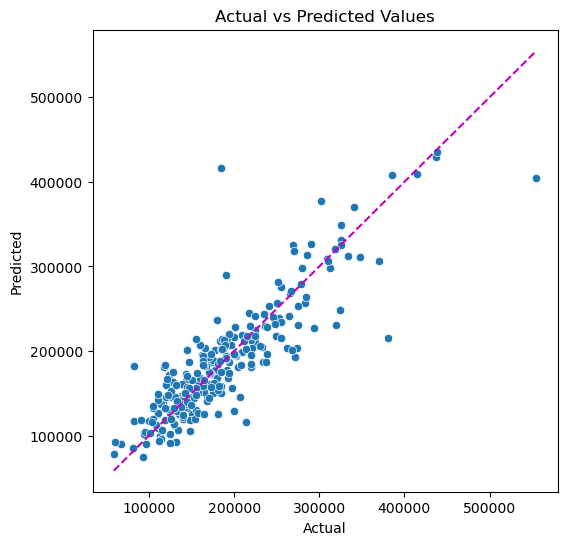

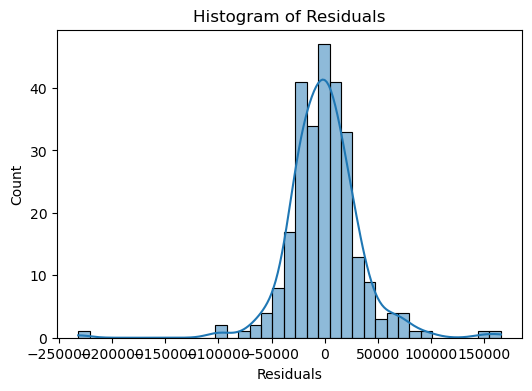

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict on the test data using the Lasso model
y_test_pred = lasso_cv_model.predict(X_test_selected)

# Calculate R-squared for test data
r2_test = r2_score(y_test_selected, y_test_pred)

# Calculate MSE and RMSE for test data
mse_test = mean_squared_error(y_test_selected, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Print the metrics for training data
print(f"Lasso R-squared (Train): {r2_train_lasso}")
print(f"Lasso Mean Squared Error (Train): {mse_train_lasso}")
print(f"Lasso Root Mean Squared Error (Train): {rmse_train_lasso}")

# Print the metrics
print(f"Lasso R-squared (Test): {r2_test}")
print(f"Lasso Mean Squared Error (Test): {mse_test}")
print(f"Lasso Root Mean Squared Error (Test): {rmse_test}")

# Plot actual vs predicted values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_selected, y=y_test_pred)
plt.plot([y_test_selected.min(), y_test_selected.max()], [y_test_selected.min(), y_test_selected.max()], 'm--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Calculate residuals
residuals_test = y_test_selected - y_test_pred

# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals_test, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()


### Check for non-linearity for top impacting features (lasso)

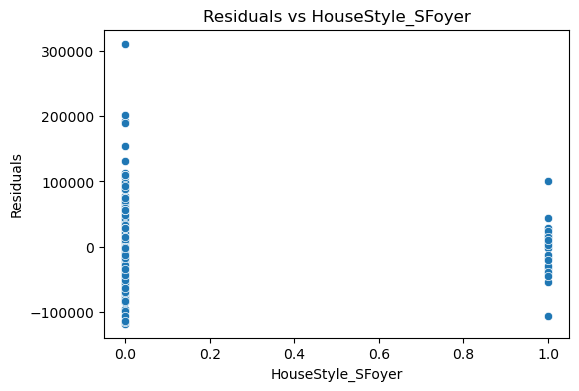

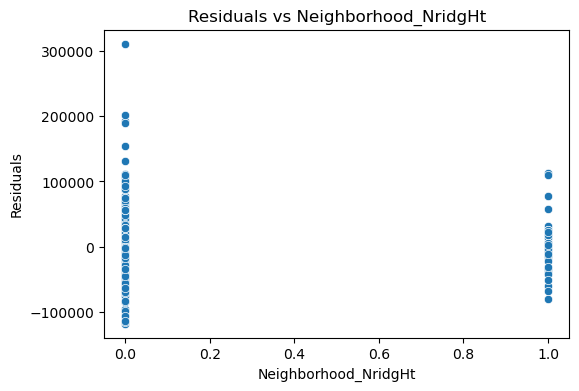

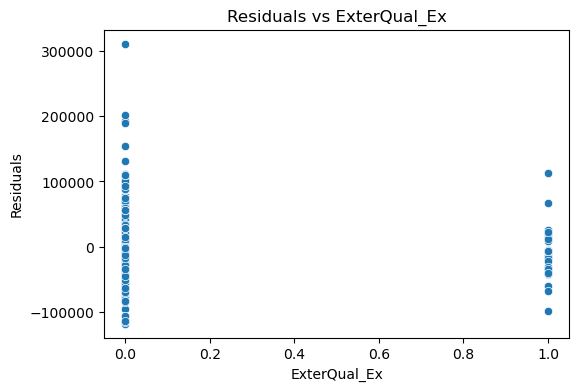

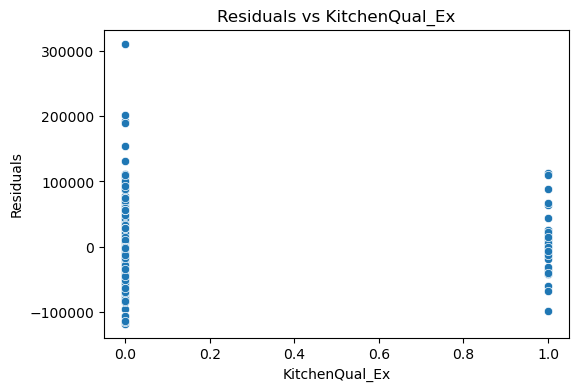

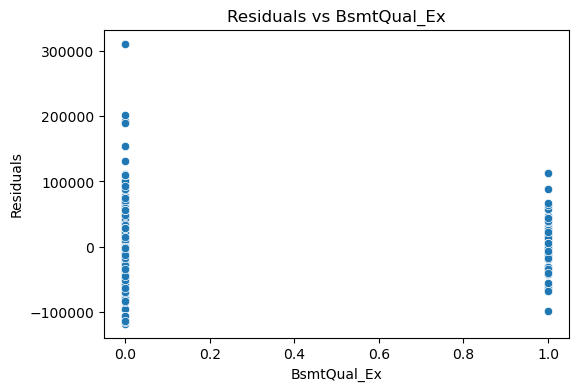

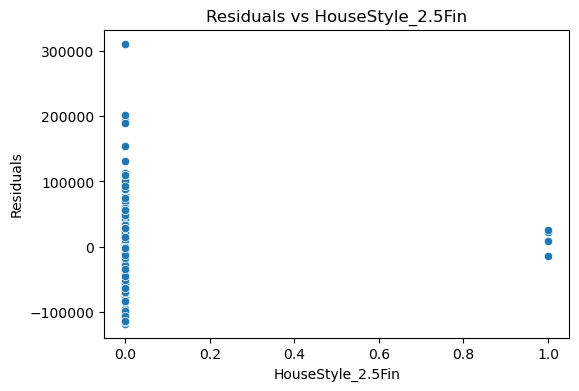

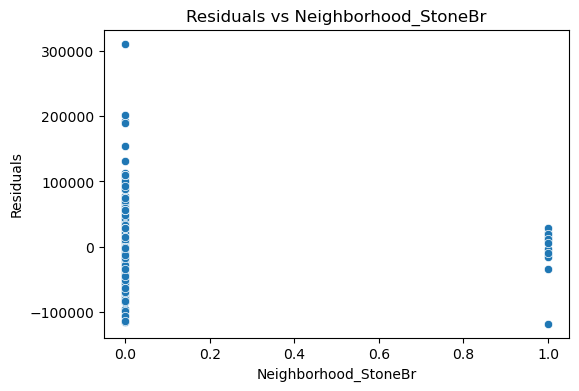

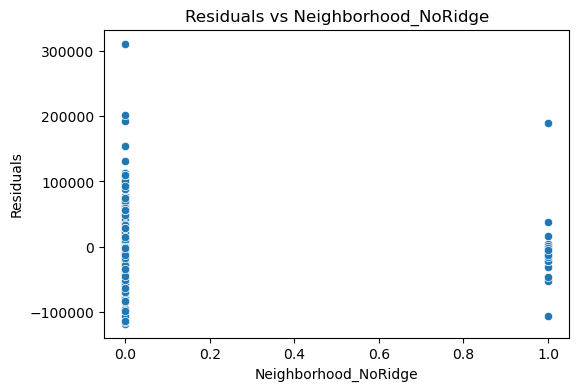

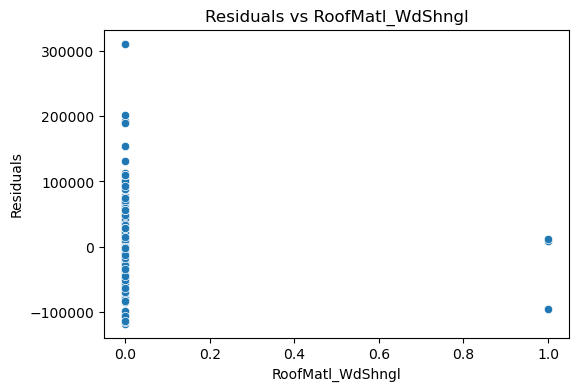

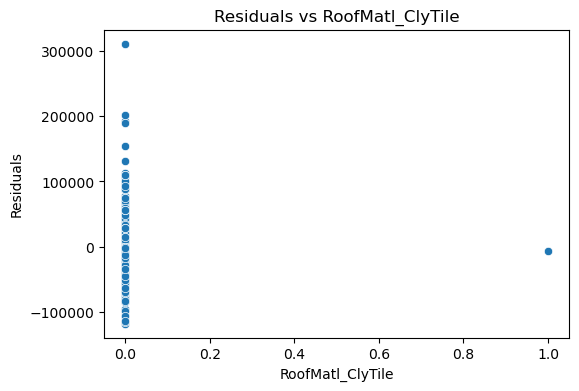

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

coefficients = np.abs(lasso_cv_model.coef_)

# Get the top 10 features' indices sorted by coefficient magnitude
top_10_indices = np.argsort(coefficients)[-10:]

# Get the feature names for the top 10 features
top_10_features = X_train_selected.columns[top_10_indices]

# # Calculate residuals based on the model trained on the selected features
# residuals = y_train_selected - y_train_pred

# Loop through each of the top 10 features and create a scatter plot against the residuals
for feature in top_10_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train_selected[feature], y=residuals_lasso)
    plt.title(f"Residuals vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Residuals")
    plt.show()


## Results Summary and Conclusion

In [17]:
# Reading the data definition file to extract full descriptions for the features
data_definition_path = 'Data Dictionary.txt'

# Reading the file and process the data definitions into a dictionary for lookup
feature_descriptions = {}
with open(data_definition_path, 'r') as file:
    data_definitions = file.readlines()

for line in data_definitions:
    parts = line.split(':')
    if len(parts) == 2:
        feature_name, description = parts[0].strip(), parts[1].strip()
        feature_descriptions[feature_name] = description

# feature_descriptions


In [18]:
# Get the transformed feature names for categorical columns
categorical_features_transformed = onehot.get_feature_names_out(input_features=categorical_cols)

lasso_coef = lasso_cv_model.coef_
ridge_coef = ridge_cv_model.coef_

# Constructing dataframes for Lasso and Ridge coefficients
feature_names = categorical_features_transformed

# Ensure feature_names only includes the selected features
selected_feature_names = [all_features[i] for i in range(len(all_features)) if rfe.support_[i]]

lasso_df = pd.DataFrame({'Feature': selected_feature_names, 'Coefficient': lasso_coef})
ridge_df = pd.DataFrame({'Feature': selected_feature_names, 'Coefficient': ridge_coef})

# Sorting the coefficients by their absolute values
lasso_df_sorted = lasso_df.reindex(lasso_df.Coefficient.abs().sort_values(ascending=False).index)
ridge_df_sorted = ridge_df.reindex(ridge_df.Coefficient.abs().sort_values(ascending=False).index)

# Load data dictionary
data_dictionary_path = 'Data Dictionary.txt'
with open(data_dictionary_path, 'r') as file:
    data_dictionary = file.read()

# Parse data dictionary
data_dict_lines = data_dictionary.split('\n')
feature_descriptions = {}
for line in data_dict_lines:
    parts = line.split(':')
    if len(parts) == 2:
        key, desc = parts[0].strip(), parts[1].strip()
        feature_descriptions[key] = desc

# Functions to process features
def extract_feature_and_category(transformed_feature):
    parts = transformed_feature.split('_')
    feature = '_'.join(parts[:-1])
    category = parts[-1]
    return feature, category

def get_feature_description(feature):
    return feature_descriptions.get(feature, 'Description not found')

# Function to create a sorted DataFrame for positive and negative coefficients separately
def create_sorted_df(model_df):
    # Splitting into positive and negative coefficients
    positive_df = model_df[model_df['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False)
    negative_df = model_df[model_df['Coefficient'] < 0].sort_values(by='Coefficient')

    # Adding descriptions
    positive_df['Original Feature'], positive_df['Category'] = zip(*positive_df['Feature'].apply(extract_feature_and_category))
    positive_df['Description'] = positive_df['Original Feature'].apply(get_feature_description)

    negative_df['Original Feature'], negative_df['Category'] = zip(*negative_df['Feature'].apply(extract_feature_and_category))
    negative_df['Description'] = negative_df['Original Feature'].apply(get_feature_description)

    return positive_df, negative_df

# Creating sorted DataFrames for Lasso and Ridge models
positive_lasso, negative_lasso = create_sorted_df(lasso_df)
positive_ridge, negative_ridge = create_sorted_df(ridge_df)

# Displaying the top 10 features with descriptions for Lasso and Ridge in tabular format
top_10_positive_lasso = positive_lasso.head(10)
top_10_negative_lasso = negative_lasso.head(10)
top_10_positive_ridge = positive_ridge.head(10)
top_10_negative_ridge = negative_ridge.head(10)

print("Top 10 Positive Features - Lasso:")

top_10_positive_lasso


Top 10 Positive Features - Lasso:


,Feature,Coefficient,Original Feature,Category,Description
76,RoofMatl_WdShngl,95943.537870,RoofMatl,WdShngl,Roof material
36,Neighborhood_NoRidge,89510.353708,Neighborhood,NoRidge,Physical locations within Ames city limits
43,Neighborhood_StoneBr,59091.896173,Neighborhood,StoneBr,Physical locations within Ames city limits
59,HouseStyle_2.5Fin,58518.311284,HouseStyle,2.5Fin,Style of dwelling
120,BsmtQual_Ex,56842.899095,BsmtQual,Ex,Evaluates the height of the basement
152,KitchenQual_Ex,51677.942293,KitchenQual,Ex,Kitchen quality
107,ExterQual_Ex,41342.794979,ExterQual,Ex,Evaluates the quality of the material on the e...
37,Neighborhood_NridgHt,40210.161908,Neighborhood,NridgHt,Physical locations within Ames city limits
27,Neighborhood_Crawfor,29415.565242,Neighborhood,Crawfor,Physical locations within Ames city limits
128,BsmtExposure_Gd,29075.005643,BsmtExposure,Gd,Refers to walkout or garden level walls


In [19]:
print("\nTop 10 Negative Features - Lasso:")
top_10_negative_lasso


Top 10 Negative Features - Lasso:


,Feature,Coefficient,Original Feature,Category,Description
69,RoofMatl_ClyTile,-134017.260544,RoofMatl,ClyTile,Roof material
62,HouseStyle_SFoyer,-40159.920771,HouseStyle,SFoyer,Style of dwelling
55,BldgType_TwnhsE,-34867.239269,BldgType,TwnhsE,Type of dwelling
54,BldgType_Twnhs,-33434.537434,BldgType,Twnhs,Type of dwelling
0,MSZoning_C (all),-31667.898594,MSZoning,C (all),Identifies the general zoning classification o...
31,Neighborhood_MeadowV,-25082.661283,Neighborhood,MeadowV,Physical locations within Ames city limits
146,CentralAir_N,-22851.844780,CentralAir,N,Central air conditioning
63,HouseStyle_SLvl,-18483.894909,HouseStyle,SLvl,Style of dwelling
15,LotConfig_FR2,-15123.984207,LotConfig,FR2,Lot configuration
28,Neighborhood_Edwards,-12399.524422,Neighborhood,Edwards,Physical locations within Ames city limits


In [20]:
print("\nTop 10 Positive Features - Ridge:")
top_10_positive_ridge


Top 10 Positive Features - Ridge:


,Feature,Coefficient,Original Feature,Category,Description
36,Neighborhood_NoRidge,75542.275975,Neighborhood,NoRidge,Physical locations within Ames city limits
76,RoofMatl_WdShngl,64261.516088,RoofMatl,WdShngl,Roof material
43,Neighborhood_StoneBr,47469.462522,Neighborhood,StoneBr,Physical locations within Ames city limits
59,HouseStyle_2.5Fin,42617.929033,HouseStyle,2.5Fin,Style of dwelling
120,BsmtQual_Ex,39378.473199,BsmtQual,Ex,Evaluates the height of the basement
152,KitchenQual_Ex,37037.518581,KitchenQual,Ex,Kitchen quality
37,Neighborhood_NridgHt,35056.077793,Neighborhood,NridgHt,Physical locations within Ames city limits
107,ExterQual_Ex,25407.496812,ExterQual,Ex,Evaluates the quality of the material on the e...
79,Exterior1st_BrkFace,24515.432533,Exterior1st,BrkFace,Exterior covering on house
128,BsmtExposure_Gd,24459.702003,BsmtExposure,Gd,Refers to walkout or garden level walls


In [21]:
print("\nTop 10 Negative Features - Ridge:")
top_10_negative_ridge


Top 10 Negative Features - Ridge:


,Feature,Coefficient,Original Feature,Category,Description
69,RoofMatl_ClyTile,-48360.102185,RoofMatl,ClyTile,Roof material
62,HouseStyle_SFoyer,-39040.260315,HouseStyle,SFoyer,Style of dwelling
31,Neighborhood_MeadowV,-31187.719408,Neighborhood,MeadowV,Physical locations within Ames city limits
0,MSZoning_C (all),-28631.855023,MSZoning,C (all),Identifies the general zoning classification o...
55,BldgType_TwnhsE,-25730.757677,BldgType,TwnhsE,Type of dwelling
54,BldgType_Twnhs,-24999.107964,BldgType,Twnhs,Type of dwelling
28,Neighborhood_Edwards,-22600.895066,Neighborhood,Edwards,Physical locations within Ames city limits
29,Neighborhood_Gilbert,-20969.540330,Neighborhood,Gilbert,Physical locations within Ames city limits
63,HouseStyle_SLvl,-19863.734969,HouseStyle,SLvl,Style of dwelling
173,GarageQual_Fa,-19377.722293,GarageQual,Fa,Garage quality


### Conclusion

Both Ridge and Lasso regularized, Linear rgeression models with 200 features, exhibit R-Square value of about 0.82 on Train set and 0.76 on Test set.

Ridge is slightly better based on the model parameters such as R-Squared, MSE and RMSE.

Using all the features is overfitting the solution, so reduced the feature count to 200 in RFE process.